

#Importation des bibliothéques




In [ ]:
import pandas as pd
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import numpy as np
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
import numpy as np
import requests
import hashlib


#Récupération du dataset néttoyé

In [ ]:
cleaned_df = pd.read_csv("cleaned_data.csv")
cleaned_df

,likes,hash_count,at_count,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC9,PC10,year,month,day,hour,day_of_week,days_since_now,type_p,type_reel
0,111607,1,4,0.343368,1.513166,4.196563,-3.272964,1.654780,0.935115,-3.424922,...,-2.111380,1.729911,2024,4,22,16,0,9,False,True
1,213879,1,2,-1.465215,-3.112650,-2.397117,0.573192,1.103260,0.702946,-0.558626,...,1.229427,-1.914897,2024,4,19,21,4,12,False,True
2,98906,0,1,-1.252858,-2.199743,-1.356287,0.581660,1.019187,0.581879,-0.280167,...,0.490072,-1.197387,2024,4,19,16,4,12,True,False
3,102748,0,2,-1.327078,-2.943203,-2.141952,0.568609,0.699506,0.660703,-0.590203,...,0.646484,-1.382502,2024,4,18,16,3,13,False,True
4,174139,1,2,-1.339071,-3.032805,-2.577601,0.503254,1.132788,0.605190,-0.508079,...,1.347221,-1.897001,2024,4,17,16,2,14,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,228248,1,2,-1.163725,-2.249420,-0.373509,0.617531,-0.034829,-0.008099,-0.596904,...,-0.014118,0.090305,2023,6,22,16,3,314,False,True
224,331201,0,2,-1.204928,-2.179248,-1.831026,-0.446576,1.203425,0.167350,-1.919619,...,0.874221,-1.530820,2023,6,21,20,2,315,False,True
225,331565,0,3,2.396401,13.909176,-5.101631,1.065974,-2.492412,2.644548,-0.234506,...,-1.189035,1.886509,2023,6,20,16,1,316,True,False
226,277650,0,6,-0.030389,4.512559,4.371739,2.222121,-1.718103,-0.825179,-0.355461,...,-4.292550,1.857781,2023,6,19,16,0,317,True,False


In [ ]:
cleaned_df.describe()

#Models



#Linear Regression

In [ ]:
# Séparation des features et de la target
X = cleaned_df.drop('likes', axis=1)
y = cleaned_df['likes']

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((182, 20), (46, 20), (182,), (46,))

#Random Forest

In [ ]:
# Création et entraînement du modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Utilisation des données non-standardisées

# Prédiction sur les données de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(452703030346.3808, -0.19931356248744603)

# Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Création et entraînement du modèle de réseau de neurones
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)  # Utilisation des données standardisées

# Prédiction sur les données de test
y_pred_nn = nn_model.predict(X_test_scaled)

# Évaluation du modèle
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

mse_nn, r2_nn


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(532132490161.83655, -0.4097403147555718)

In [ ]:
# Définition des modèles
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
nn_model = MLPRegressor(random_state=42, max_iter=500)

# Entraînement des modèles
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#Model evalution

In [ ]:
# Calcul des scores R²
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_nn = r2_score(y_test, y_pred_nn)

# Création de la liste des scores R²
r2_values = [r2_linear, r2_rf, r2_nn]

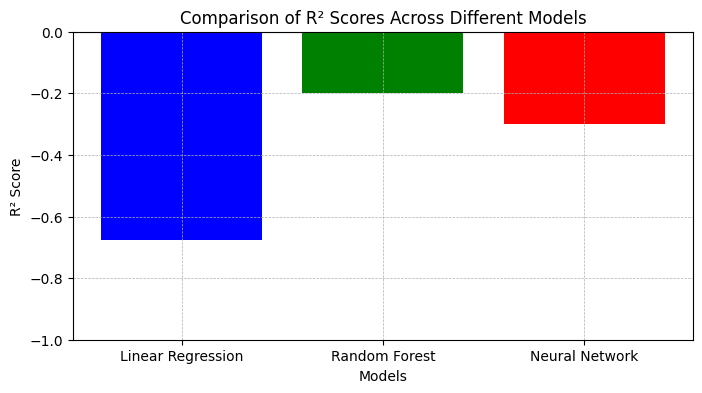

In [ ]:
# Noms des modèles et valeurs R² correspondantes
models = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_values = [r2_linear, r2_rf, r2_nn]

# Création du graphique
plt.figure(figsize=(8, 4))
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores Across Different Models')
plt.ylim([-1, 0])  # Limiter l'axe des y pour mieux visualiser les valeurs négatives
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='grey', linewidth=0.8)  # Ligne zéro pour référence
plt.show()


# URL analysis


In [ ]:
def download_file(url, target_path, expected_hash):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(target_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

        # Vérification du hash du fichier téléchargé
        sha256_hash = hashlib.sha256()
        with open(target_path, "rb") as f:
            for byte_block in iter(lambda: f.read(4096), b""):
                sha256_hash.update(byte_block)
        file_hash = sha256_hash.hexdigest()

        if file_hash != expected_hash:
            print("Erreur : Le hash du fichier ne correspond pas au hash attendu.")
            print(f"Hash attendu: {expected_hash}")
            print(f"Hash obtenu: {file_hash}")
            return False
        return True
    else:
        print("Erreur : Impossible de télécharger le fichier.")
        return False

# Utilisation de la fonction
url = 'https://exemple.com/fichier.zip'
expected_hash = '64373286793e3c8b2b4e3219cbf3544b'
target_path = '/chemin/vers/le/fichier.zip'

if download_file(url, target_path, expected_hash):
    print("Téléchargement et vérification réussis.")
else:
    print("Téléchargement échoué ou fichier corrompu.")


Erreur : Impossible de télécharger le fichier.
Téléchargement échoué ou fichier corrompu.


In [ ]:
# Chargement du modèle VGG16 pré-entraîné
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features_from_url(url):
    try:
        # Téléchargement de l'image
        response = requests.get(url)
        img = load_img(BytesIO(response.content), target_size=(224, 224))
    except Exception as e:
        print(f"Erreur lors du téléchargement de l'image : {e}")
        return None

    # Préparation de l'image pour le modèle VGG16
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)

    # Extraction des caractéristiques
    features = model.predict(img_preprocessed)
    return features.flatten()

# Exemple d'utilisation dans un dataframe
# data['features'] = data['url'].apply(extract_features_from_url)


439443456/553467096 [======================>.......] - ETA: 1s

ValueError: Incomplete or corrupted file detected. The auto file hash does not match the provided value of 64373286793e3c8b2b4e3219cbf3544b.